<a href="https://colab.research.google.com/github/BRD90/Dataset/blob/master/EDA_on_Vehicle_Insurance_Customer_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A company has customer data that contains 8 columns of customer details and another table having name customer_policy data contains the policy details of the customer. 

The company intends to offer some discount in premium for certain customers. To do that they ask their Data scientist team to get some information. Hence, following tasks DS team decided to perform:

1. Add the column names to both datasets:

In [ ]:
import pandas as pd
import numpy as np
DF1=pd.read_csv('.\customer_details.csv',header=None,names=['customer_id','gender','age','driving licence present','region code','previously insured','vehicle age','vehicle damage'])
DF1

,customer_id,gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,0.0,1,2.0,3.0,4.0,5.0,6,7
1,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
2,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
3,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
4,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381105,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381106,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381107,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381108,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [ ]:
DF2=pd.read_csv('.\customer_policy_details.csv',header=None,names=['customer_id','annual premium (in Rs)','sales channel code','vintage','response'])
DF2

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,0.0,1.0,2.0,3.0,4.0
1,1.0,40454.0,26.0,217.0,1.0
2,2.0,33536.0,26.0,183.0,0.0
3,3.0,38294.0,26.0,27.0,1.0
4,4.0,28619.0,152.0,203.0,0.0
...,...,...,...,...,...
381105,381105.0,30170.0,26.0,88.0,0.0
381106,381106.0,40016.0,152.0,131.0,0.0
381107,381107.0,35118.0,160.0,161.0,0.0
381108,381108.0,44617.0,124.0,74.0,0.0


2. Checking and Cleaning Data Quality:

In [ ]:
print("Total null values in DF1 and DF2 column wise:\n ")
print(DF1.isnull().sum())
print(DF2.isnull().sum())

Total null values in DF1 and DF2 column wise:
 
customer_id                386
gender                     368
age                        368
driving licence present    393
region code                392
previously insured         381
vehicle age                381
vehicle damage             407
dtype: int64
customer_id               387
annual premium (in Rs)    346
sales channel code        400
vintage                   388
response                  361
dtype: int64


In [ ]:
print("All the null values from  DF1 and DF2 are cleared! ")
DF1.dropna(subset=['customer_id'],how='any',inplace=True)
DF2.dropna(subset=['customer_id'],how='any',inplace=True)


DF1['age'].fillna(DF1['age'].mean(),inplace=True)
DF1['driving licence present'].fillna(DF1['driving licence present'].mean(),inplace=True)
DF1['region code'].fillna(DF1['region code'].mean(),inplace=True)
DF1['previously insured'].fillna(DF1['previously insured'].mean(),inplace=True)
DF2['annual premium (in Rs)'].fillna(DF2['annual premium (in Rs)'].mean(),inplace=True)
DF2['sales channel code'].fillna(DF2['sales channel code'].mean(),inplace=True)
DF2['vintage'].fillna(DF2['vintage'].mean(),inplace=True)
DF2['response'].fillna(DF2['response'].mean(),inplace=True)


DF1['gender'].fillna(DF1['gender'].mode()[0],inplace=True)
DF1['vehicle age'].fillna(DF1['vehicle age'].mode()[0],inplace=True)
DF1['vehicle damage'].fillna(DF1['vehicle damage'].mode()[0],inplace=True)

All the null values from  DF1 and DF2 are cleared! 


In [ ]:
print(DF1.isnull().sum())
print(DF2.isnull().sum())

customer_id                0
gender                     0
age                        0
driving licence present    0
region code                0
previously insured         0
vehicle age                0
vehicle damage             0
dtype: int64
customer_id               0
annual premium (in Rs)    0
sales channel code        0
vintage                   0
response                  0
dtype: int64


In [ ]:
DF1.describe()

,customer_id,age,driving licence present,region code,previously insured
count,380724.000000,380724.000000,380724.000000,380724.000000,380724.000000
mean,190548.275754,38.822691,0.997873,26.389377,0.458271
std,110017.094100,15.504920,0.046218,13.223703,0.498060
min,0.000000,2.000000,0.000000,0.000000,0.000000
25%,95268.750000,25.000000,1.000000,15.000000,0.000000
50%,190542.500000,36.000000,1.000000,28.000000,0.000000
75%,285822.250000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,3.000000,52.000000,5.000000


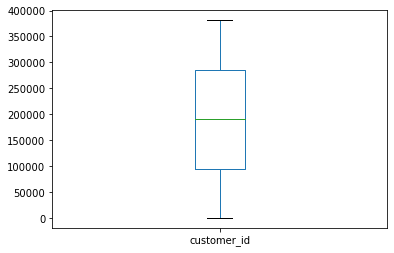

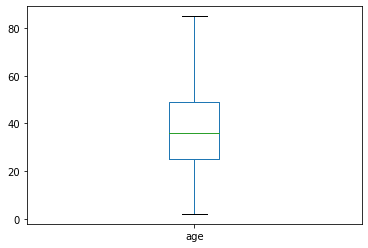

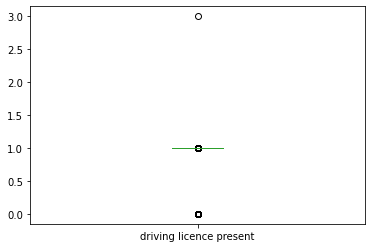

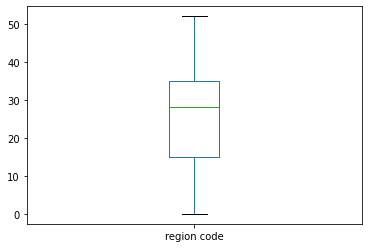

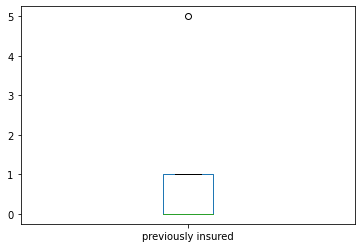

In [ ]:
import matplotlib.pyplot as plt
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(DF1,'customer_id') 
plot_boxplot(DF1,'age')
plot_boxplot(DF1,'driving licence present') 
plot_boxplot(DF1,'region code')
plot_boxplot(DF1,'previously insured') 

In [ ]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q1+1.5*IQR
    ls=df.index[(df[ft]<lower_bound)|(df[ft]>upper_bound)]
    return ls   

In [ ]:
index_list = []
for feature in ['customer_id','age','driving licence present','region code','previously insured']:
    index_list.extend(outliers(DF1,feature))

In [ ]:
index_list

[381100,
 381101,
 381102,
 381103,
 381104,
 381105,
 381106,
 381107,
 381108,
 381109,
 2,
 14,
 15,
 21,
 32,
 37,
 40,
 54,
 59,
 63,
 69,
 77,
 80,
 85,
 93,
 98,
 109,
 117,
 162,
 163,
 225,
 230,
 234,
 240,
 259,
 271,
 290,
 302,
 309,
 322,
 332,
 340,
 378,
 382,
 388,
 396,
 402,
 406,
 409,
 435,
 436,
 442,
 454,
 464,
 467,
 469,
 471,
 473,
 481,
 486,
 487,
 489,
 491,
 516,
 522,
 564,
 568,
 575,
 588,
 594,
 596,
 614,
 616,
 618,
 621,
 672,
 673,
 678,
 682,
 683,
 688,
 702,
 724,
 733,
 736,
 740,
 746,
 767,
 768,
 782,
 787,
 795,
 807,
 814,
 820,
 827,
 835,
 840,
 851,
 860,
 874,
 875,
 880,
 884,
 885,
 891,
 905,
 912,
 921,
 928,
 929,
 937,
 938,
 978,
 992,
 1014,
 1024,
 1030,
 1045,
 1050,
 1062,
 1064,
 1067,
 1077,
 1080,
 1082,
 1089,
 1091,
 1096,
 1107,
 1124,
 1130,
 1137,
 1158,
 1173,
 1179,
 1180,
 1181,
 1214,
 1224,
 1235,
 1245,
 1277,
 1282,
 1312,
 1315,
 1331,
 1347,
 1361,
 1367,
 1374,
 1379,
 1383,
 1405,
 1414,
 1441,
 1445,
 14

In [ ]:
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [ ]:
DF1_outlierfree=remove(DF1,index_list)

In [ ]:
DF1_outlierfree.shape

(300742, 8)

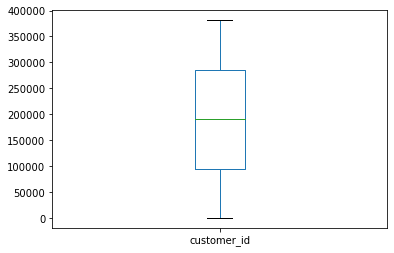

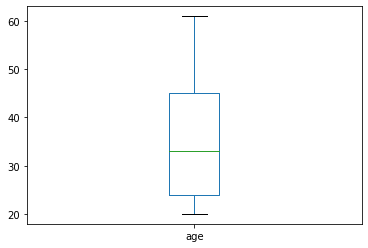

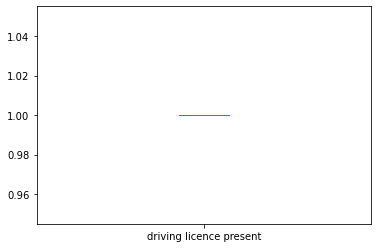

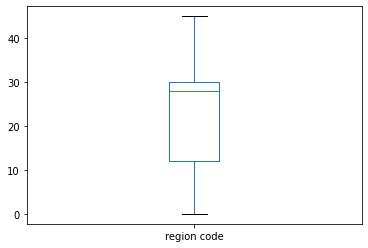

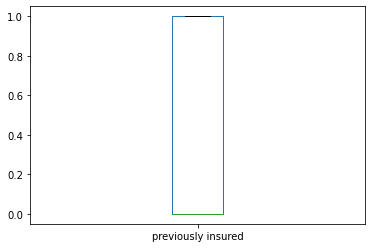

In [ ]:
plot_boxplot(DF1_outlierfree,'customer_id')
plot_boxplot(DF1_outlierfree,'age')
plot_boxplot(DF1_outlierfree,'driving licence present')
plot_boxplot(DF1_outlierfree,'region code')
plot_boxplot(DF1_outlierfree,'previously insured')

In [ ]:
DF1_outlierfree

,customer_id,gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
1,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
3,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
4,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
5,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
6,6.0,Female,24.0,1.0,33.0,0.0,< 1 Year,Yes
...,...,...,...,...,...,...,...,...
381094,381094.0,Female,22.0,1.0,28.0,1.0,< 1 Year,No
381095,381095.0,Female,47.0,1.0,20.0,0.0,1-2 Year,Yes
381096,381096.0,Male,52.0,1.0,28.0,0.0,1-2 Year,Yes
381097,381097.0,Female,49.0,1.0,10.0,0.0,1-2 Year,Yes


In [ ]:
DF2.describe()

,customer_id,annual premium (in Rs),sales channel code,vintage,response
count,380723.000000,380723.000000,380723.000000,380723.000000,380723.000000
mean,190546.991175,30563.919425,112.036398,154.346794,0.122536
std,110014.113098,17190.196338,54.177268,83.628346,0.327797
min,0.000000,1.000000,1.000000,3.000000,0.000000
25%,95275.500000,24416.000000,29.000000,82.000000,0.000000
50%,190536.000000,31656.000000,131.000000,154.000000,0.000000
75%,285818.500000,39391.500000,152.000000,227.000000,0.000000
max,381109.000000,540165.000000,163.000000,299.000000,4.000000


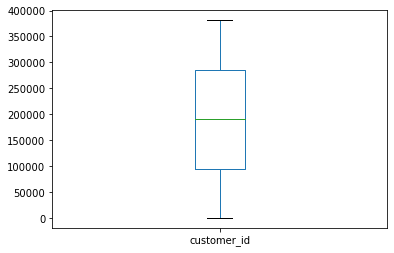

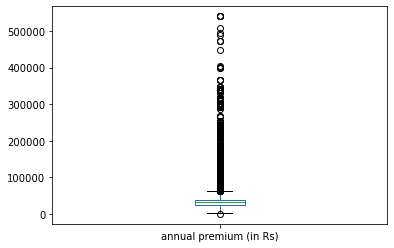

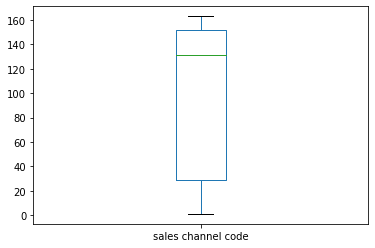

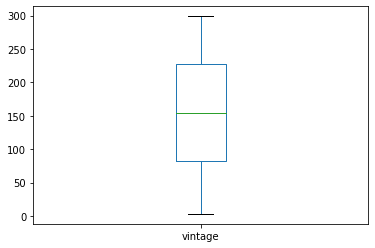

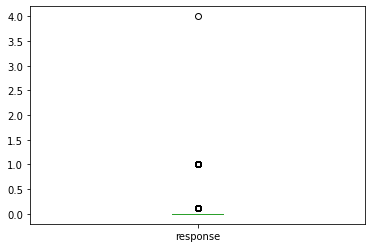

In [ ]:
import matplotlib.pyplot as plt
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show() 
plot_boxplot(DF2,'customer_id') 
plot_boxplot(DF2,'annual premium (in Rs)') 
plot_boxplot(DF2,'sales channel code') 
plot_boxplot(DF2,'vintage') 
plot_boxplot(DF2,'response') 

In [ ]:
index_list = []
for feature in ['customer_id','annual premium (in Rs)','sales channel code','vintage','response']:
    index_list.extend(outliers(DF2,feature))

In [ ]:
index_list

[381091,
 381092,
 381093,
 381094,
 381095,
 381096,
 381097,
 381098,
 381099,
 381100,
 381101,
 381102,
 381103,
 381104,
 381105,
 381106,
 381107,
 381108,
 381109,
 0,
 11,
 12,
 22,
 26,
 32,
 38,
 54,
 57,
 68,
 69,
 97,
 106,
 131,
 140,
 146,
 150,
 151,
 157,
 168,
 171,
 177,
 179,
 185,
 201,
 210,
 217,
 254,
 271,
 280,
 282,
 310,
 311,
 316,
 323,
 335,
 343,
 363,
 373,
 374,
 375,
 376,
 383,
 384,
 385,
 391,
 402,
 430,
 464,
 469,
 480,
 481,
 484,
 485,
 507,
 508,
 509,
 525,
 545,
 548,
 559,
 568,
 572,
 573,
 574,
 582,
 588,
 590,
 605,
 606,
 615,
 617,
 618,
 637,
 638,
 649,
 661,
 666,
 670,
 688,
 691,
 696,
 720,
 723,
 724,
 735,
 736,
 737,
 757,
 768,
 797,
 799,
 802,
 810,
 812,
 818,
 819,
 831,
 835,
 837,
 839,
 840,
 841,
 843,
 854,
 870,
 880,
 885,
 899,
 912,
 922,
 925,
 929,
 932,
 933,
 945,
 954,
 963,
 972,
 974,
 976,
 999,
 1001,
 1003,
 1008,
 1009,
 1011,
 1022,
 1033,
 1042,
 1045,
 1069,
 1080,
 1098,
 1107,
 1113,
 1119,
 1141

In [ ]:
DF2_outlierfree=remove(DF2,index_list)

In [ ]:
DF2_outlierfree.shape

(295926, 5)

In [ ]:
DF2_outlierfree

,customer_id,annual premium (in Rs),sales channel code,vintage,response
2,2.0,33536.0,26.0,183.0,0.0
4,4.0,28619.0,152.0,203.0,0.0
5,5.0,27496.0,152.0,39.0,0.0
6,6.0,2630.0,160.0,176.0,0.0
7,7.0,23367.0,152.0,249.0,0.0
...,...,...,...,...,...
381085,381085.0,28218.0,152.0,238.0,0.0
381086,381086.0,30374.0,163.0,212.0,0.0
381087,381087.0,2630.0,152.0,208.0,0.0
381088,381088.0,34683.0,152.0,34.0,0.0


iii. White spaces.
Remove white spaces

In [ ]:
DF1_white_spacefree = DF1_outlierfree.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
DF2_white_spacefree = DF2_outlierfree.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

iv. case correction(lower or upper, any one) 

In [ ]:
DF1_lower = DF1_white_spacefree.apply(lambda x: x.astype(str).str.lower())
DF1_lower

,customer_id,gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
1,1.0,male,44.0,1.0,28.0,0.0,> 2 years,yes
3,3.0,male,47.0,1.0,28.0,0.0,> 2 years,yes
4,4.0,male,21.0,1.0,11.0,1.0,< 1 year,no
5,5.0,female,29.0,1.0,41.0,1.0,< 1 year,no
6,6.0,female,24.0,1.0,33.0,0.0,< 1 year,yes
...,...,...,...,...,...,...,...,...
381094,381094.0,female,22.0,1.0,28.0,1.0,< 1 year,no
381095,381095.0,female,47.0,1.0,20.0,0.0,1-2 year,yes
381096,381096.0,male,52.0,1.0,28.0,0.0,1-2 year,yes
381097,381097.0,female,49.0,1.0,10.0,0.0,1-2 year,yes


v. Convert nominal data (categorical) into dummies 
for future modeling use if required

In [ ]:
DF1_dummy=DF1_lower.copy()
DF1_dummy=pd.get_dummies(DF1_dummy,columns=['gender','vehicle age','vehicle damage'])
DF1_dummy

,customer_id,age,driving licence present,region code,previously insured,gender_female,gender_male,vehicle age_1-2 year,vehicle age_< 1 year,vehicle age_> 2 years,vehicle damage_no,vehicle damage_yes
1,1.0,44.0,1.0,28.0,0.0,0,1,0,0,1,0,1
3,3.0,47.0,1.0,28.0,0.0,0,1,0,0,1,0,1
4,4.0,21.0,1.0,11.0,1.0,0,1,0,1,0,1,0
5,5.0,29.0,1.0,41.0,1.0,1,0,0,1,0,1,0
6,6.0,24.0,1.0,33.0,0.0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
381094,381094.0,22.0,1.0,28.0,1.0,1,0,0,1,0,1,0
381095,381095.0,47.0,1.0,20.0,0.0,1,0,1,0,0,0,1
381096,381096.0,52.0,1.0,28.0,0.0,0,1,1,0,0,0,1
381097,381097.0,49.0,1.0,10.0,0.0,1,0,1,0,0,0,1


vi. Drop Duplicates (duplicated rows)

In [ ]:
DF1_lower.drop_duplicates(subset ="customer_id",keep = False, inplace = True)

In [ ]:
DF2_white_spacefree.drop_duplicates(subset ="customer_id",keep = False, inplace = True)

3. Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables.

(Hint: use pd.merge() function)

In [ ]:
Master_Table=pd.merge(DF1_white_spacefree,DF2_white_spacefree,on='customer_id')
Master_Table

,customer_id,gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage,annual premium (in Rs),sales channel code,vintage,response
0,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
1,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0
2,6.0,Female,24.0,1.0,33.0,0.0,< 1 Year,Yes,2630.0,160.0,176.0,0.0
3,7.0,Male,23.0,1.0,11.0,0.0,< 1 Year,Yes,23367.0,152.0,249.0,0.0
4,9.0,Female,24.0,1.0,3.0,1.0,< 1 Year,No,27619.0,152.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
231955,381085.0,Male,22.0,1.0,15.0,0.0,< 1 Year,No,28218.0,152.0,238.0,0.0
231956,381086.0,Male,39.0,1.0,28.0,0.0,1-2 Year,Yes,30374.0,163.0,212.0,0.0
231957,381087.0,Female,34.0,1.0,35.0,0.0,1-2 Year,Yes,2630.0,152.0,208.0,0.0
231958,381088.0,Male,24.0,1.0,14.0,1.0,< 1 Year,No,34683.0,152.0,34.0,0.0


4. Company needs some important information from the master table to make decisions for future growth.They needs following information:

In [ ]:
print(Master_table.groupby(['gender']).mean()['annual premium (in Rs)'])
print("\n",Master_table.groupby(['age']).mean()['annual premium (in Rs)'])
print("\n**********************************************************************************")
print("\n",Master_table.groupby(['gender']).sum())
print("******* Hence I found the data in both the genders are approximately same!*******\n")
print("**********************************************************************************\n")
print("\n",Master_table.groupby(['vehicle age']).mean()['annual premium (in Rs)'])


gender
Female    27209.180782
Male      27032.271884
Name: annual premium (in Rs), dtype: float64

 age
20.000000    24479.239046
21.000000    28025.560201
22.000000    28308.032926
23.000000    28144.238441
24.000000    28388.607728
25.000000    28076.377004
26.000000    27142.922378
27.000000    26707.665975
28.000000    26020.462885
29.000000    25616.131263
30.000000    25414.335848
31.000000    24598.321586
32.000000    24181.125013
33.000000    24126.928611
34.000000    24338.787457
35.000000    24175.414339
36.000000    24658.145073
37.000000    24880.222069
38.000000    25258.250336
38.822691    28859.915663
39.000000    25786.614629
40.000000    25972.817226
41.000000    26794.201548
42.000000    26814.793535
43.000000    27734.640201
44.000000    27818.197387
45.000000    28016.762947
46.000000    27452.010170
47.000000    27674.565650
48.000000    27583.602722
49.000000    27450.561301
50.000000    27687.933190
51.000000    26911.190977
52.000000    27257.366093
53.000000   

5. Is there any relation between Person Age and annual premium?

In [ ]:
Correlation_coefficient=Master_table["age"].corr(Master_table["annual premium (in Rs)"])
Correlation_coefficient

-0.00792458400125792

In [ ]:
# Correlation coefficient is: > 0.5    Hence there is a Strong negative relationship